# Finding and masking bright pixels

- https://docs.sunpy.org/en/stable/generated/gallery/computer_vision_techniques/finding_masking_bright_pixels.html

How to find and overplot the location of the brightest
pixel and then mask pixels around that region.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

import astropy.units as u

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE
from sunpy.map.maputils import all_coordinates_from_map

We start with the sample data.

In [ ]:
aia = sunpy.map.Map(AIA_171_IMAGE)

To find the brightest pixel, we find the maximum in the AIA image data
then transform that pixel coordinate to a map coordinate.

In [ ]:
pixel_pos = np.argwhere(aia.data == aia.data.max()) * u.pixel
hpc_max = aia.wcs.pixel_to_world(pixel_pos[:, 1], pixel_pos[:, 0])

Let's plot the results.

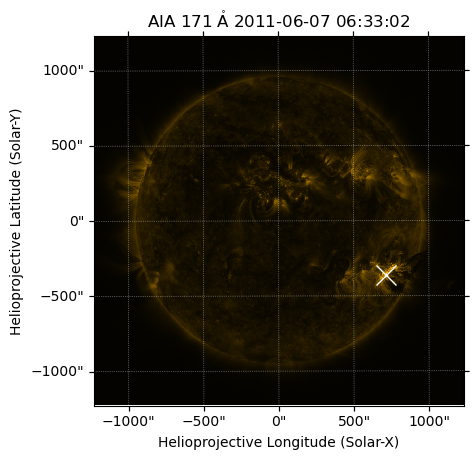

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot(axes=ax)
ax.plot_coord(hpc_max, color='white', marker='x', markersize=15)
plt.show()

A utility function gives us access to the helioprojective coordinate of each
pixels. We create a new array which contains the normalized radial position
for each pixel adjusted for the position of the brightest pixel
(using ``hpc_max``) and then create a new map.

In [ ]:
hpc_coords = all_coordinates_from_map(aia)
r_mask = np.sqrt((hpc_coords.Tx - hpc_max.Tx) ** 2 +
                 (hpc_coords.Ty - hpc_max.Ty) ** 2) / aia.rsun_obs
mask = ma.masked_less_equal(r_mask, 0.1)
scaled_map = sunpy.map.Map(aia.data, aia.meta, mask=mask.mask)

Let's plot the results.

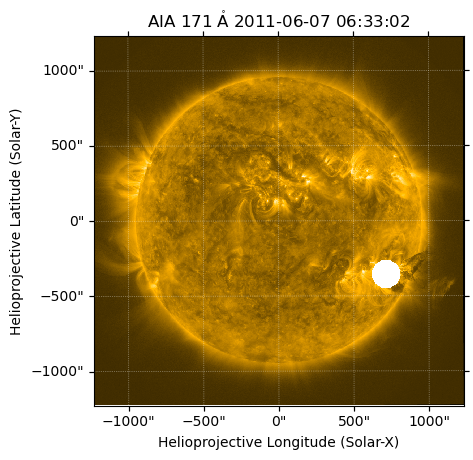

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=scaled_map)
scaled_map.plot(axes=ax)
plt.show()